In [1]:
#Libraries import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("data.csv")


In [3]:
#Removing unnecessary columns
df = df.drop(['mode' , 'danceability_%' , 'cover_url' , 'valence_%' , 'energy_%' , 'acousticness_%' , 'instrumentalness_%' ,  'liveness_%' , 'speechiness_%' , 'released_year' ,  'released_month' , 'released_day'] , axis = 1)


In [4]:
df.head(10) #Output first 10 lines

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,826,125,B
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,382,92,C#
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,949,138,F
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,548,170,A
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,425,144,A
5,Sprinter,"Dave, Central Cee",2,2186,91,183706234,67,213,88,17,946,141,C#
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,3090,50,725980112,34,222,43,13,418,148,F
7,Columbia,Quevedo,1,714,43,58149378,25,89,30,13,194,100,F
8,fukumean,Gunna,1,1096,83,95217315,60,210,48,11,953,130,C#
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2953,44,553634067,49,110,66,13,339,170,D


# Data Description:
  - **Track name:** this column responsible for the names of the tracks in the dataset.
  - **Artist(s) name:** column which display artist(-s) name of the songs.
  - **Artist count:** this column shows how many artist(-s) are involved in the song.
  - **In spotify playlists:** number of playlists that contain a song.
  - **In spotify charts:** the presence of a track in Spotify charts (e.g. top 50, top 100, etc.).
  - **Streams:** total number of plays of the track on Spotify.
  - **In apple playlists:** number of playlists on Apple Music that contain a track.
  - **In apple charts:** the presence of a track in Apple charts.
  - **In deezer playlists:** number of playlists on Deezer that contain a track.
  - **In deezer charts:** the presence of a track in Deezer charts.
  - **In shazam charts:** the presence of a track in Shazam charts.

In [5]:
df.info() #General dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   in_spotify_playlists  953 non-null    int64 
 4   in_spotify_charts     953 non-null    int64 
 5   streams               953 non-null    object
 6   in_apple_playlists    953 non-null    int64 
 7   in_apple_charts       953 non-null    int64 
 8   in_deezer_playlists   953 non-null    object
 9   in_deezer_charts      953 non-null    int64 
 10  in_shazam_charts      903 non-null    object
 11  bpm                   953 non-null    int64 
 12  key                   858 non-null    object
dtypes: int64(7), object(6)
memory usage: 96.9+ KB


# Analyze data types for each column
- Column 'track_name'(dtype object): There won't be any errors here, but I can check for duplicate values to make sure each **track_name** is unique
  
- Column 'artist(s)_name'(dtype object): Also to check whether the same artists appear multiple times in the dataset and identify the most popular artists
  
- Column 'artist_count'(dtype int): Check if there are songs with multiple artists and determine how often this happens
  
- Column 'in_spotify_playlists'(dtype int): Evaluate the distribution of songs by the number of playlists. There may be a sharp gap between popular and less popular tracks
  
- Column 'in_spotify_charts'(dtype int): Check if there are any tracks that did not chart at all (value = 0)
  
- Column 'streams'(dtype object): First of all we need to convert **streams** to an float value, because errors may occur while filtering data, if there are missing (NaN) values in the data, they can be handled by filling them with the mean or by deleting the corresponding rows
 
- Column 'in_apple_playlists' (dtype int): Similar to Spotify, you can plot the distribution of the number of playlists
 
- Column 'in_apple_charts' (dtype int): Compare the number of songs that hit the Apple and Spotify charts and spot the differences
  
- Column 'in_deezer_playlists' (dtype object): Strange data type (should be int, but object is listed). Again, the column needs to be converted to int values.
  
- Column 'in_deezer_charts' (dtype int): Similar to Apple and Spotify, you can see how many songs are in Deezer charts
  
- Column 'in_shazam_charts' (dtype object): Similar situation with the data type. Need to be converted to int and check if there are tracks popular only in Shazam
  
- Column 'bpm' (dtype int): Can plot a histogram by using matplotlib to see the distribution of song tempos. This can show which tempos are most popular.
  
- Column 'key' (dtype object): 858 non-empty values, so 95 rows have gaps. Need to decide how to deal with them (fill with the most frequent value or delete rows). Also analyze which sentiments are used most often
  

In [6]:
df['streams'] = pd.to_numeric(df['streams'] , errors = 'coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'] , errors = 'coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'] , errors = 'coerce')

In [7]:
df.describe()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm
count,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,874.000000,953.000000,896.000000,953.000000
mean,1.556139,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,109.740275,2.666317,51.176339,122.540399
std,0.893044,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,178.811406,6.035599,126.487856,28.057802
min,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000
25%,1.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,12.000000,0.000000,0.000000,100.000000
50%,1.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,36.500000,0.000000,2.000000,121.000000
75%,2.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,110.000000,2.000000,36.000000,140.000000
max,8.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,974.000000,58.000000,953.000000,206.000000


# Column Analysis Based on Descriptive Statistics
### 1. Column : 'Artist_count'
- Number of artists in the song. If there is a zero value in the column (they don't exist), this may be an error, so needed to be checked.
### 2. Column: 'In_spotify_playlists'
- The average number of tracks in Spotify playlists is 5k but the minimum is 31 which may be an anomaly and such playlists should be checked as it may be a mistake.
### 3. Column: 'In_spotify_charts'
- There are tracks that have never been in the charts, the average value is 12 (on average, a track has been in the charts 12 times), the maximum is 147. Need to check which tracks have never appeared in the charts, as well as the track(-s) that have been in the charts the most times.
### 4. Column: 'Streams'
- The minimum value of song listening is 2762, the average is 500+ million, which indicates that the dataset mainly contains popular songs, the maximum value is 3.7 billion. You can find the most listened to track from the dataset, the least listened to, and also check the column for empty values.
### 5. Column 'In_apple_playlists' 
- Check for empty values. Also check if there are songs in the tops of Spotify, but are absent in Apple
### 6. Column 'In_apple_charts'
- Check out which tracks have never made it into the Apple charts
### 7. Column 'In_deezer_playlists'
- It is advisable to check for empty values and replace with 0 (never been in playlists). Also check which songs were less than 10 times in Deezer playlists.
### 8. Column 'In_deezer_charts'
- Most of the songs didn't make it into the Deezer charts. Check which of the majority of songs did make it into the charts.
### 9. Column 'In_shazam_charts'
- Check for empty values (NaN). These values may mean that there is no information about the song's hits in the Shazam chart. If there are many such values, you can consider whether they need to be filled in (for example, replaced with 0) or left as is.
### 10. Column 'bpm'
- As always, check for empty values, as well as for values that are zero. BPM in this dataset is in the range from 65 to 206, find songs that are out of range, and delete rows.
  

In [8]:
(df.isnull().sum()) #Checking for missing values

track_name               0
artist(s)_name           0
artist_count             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts        57
bpm                      0
key                     95
dtype: int64

In [11]:
#Output of the 10 most popular artists in dataset
df['artist(s)_name'].value_counts()


artist(s)_name
Taylor Swift          34
The Weeknd            21
SZA                   19
Bad Bunny             19
Harry Styles          16
                      ..
Kordhell               1
Kenia OS               1
Feid, Mora             1
Mae Stephens           1
Feid, Sech, Jhayco     1
Name: count, Length: 641, dtype: int64

In [9]:
print(df['track_name'].duplicated().sum())  #Cheking for duplicates in track name column
df = df.drop_duplicates(subset='track_name')

10


In [10]:
print(df.duplicated(subset=['track_name', 'artist(s)_name']).sum()) #Checking whether the same artists and same song appear multiple times in the dataset

0


In [18]:
#Count songs with multiple artists
songs_with_multiple_artists = df[df['artist_count'] > 1]
num_of_songs_with_multiple_artists = songs_with_multiple_artists.shape[0]
print(num_of_songs_with_multiple_artists)

364


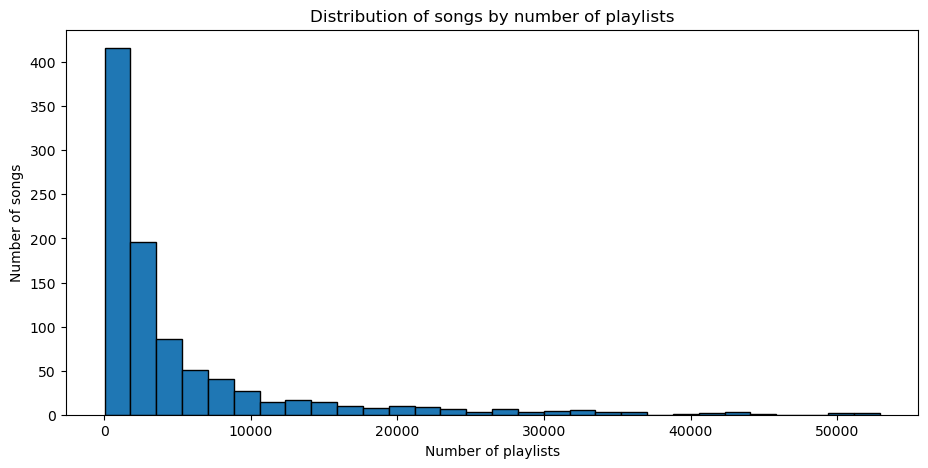

In [22]:
#Analysis of the number of playlists that contain songs
plt.figure(figsize=(11,5))
plt.hist(df['in_spotify_playlists'], bins=30, edgecolor='black')
plt.xlabel('Number of playlists')
plt.ylabel('Number of songs')
plt.title('Distribution of songs by number of playlists')
plt.show()           

## Histogram output:
- #### 1. Distribution bias – most songs end up in a relatively small number of playlists, while a small portion of songs are present in a huge number of playlists.
- #### 2. Gap between popular and unpopular tracks – there is a sharp difference between ordinary songs and hits that are added to tens of thousands of playlists.
- #### 3. Possible outliers - a few songs appear in an extremely large number of playlists (e.g. over 50,000), which may indicate hits or marketing campaigns.
- #### 4. Log-normal distribution - many songs with a small number of playlists and a few with a huge number

In [12]:
#Finding the most popular song in dataset
df.loc[df['streams'].idxmax(), ['track_name' , 'streams']]


track_name    Blinding Lights
streams          3703895074.0
Name: 55, dtype: object

In [13]:
#Finding the most unpopular song in dataset
df.loc[df['streams'].idxmin(), ['track_name' ,'streams']]

track_name    Que Vuelvas
streams            2762.0
Name: 123, dtype: object

In [15]:
#Output of the 10  most popular songs in dataset
df.sort_values(by='streams' , ascending = False).head(10)[['track_name' ,'streams']]

,track_name,streams
55,Blinding Lights,3.703895e+09
179,Shape of You,3.562544e+09
86,Someone You Loved,2.887242e+09
620,Dance Monkey,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,2.808097e+09
162,One Dance,2.713922e+09
84,STAY (with Justin Bieber),2.665344e+09
140,Believer,2.594040e+09
725,Closer,2.591224e+09
48,Starboy,2.565530e+09
